<a href="https://colab.research.google.com/github/UKashNK/Income-prediction-and-Cirrhosis-prediction/blob/main/PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2

*Author*: KATENDE UKASHA NDUGWA KINENE

##Importing modules and describing functions

In [146]:
# Import packages
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno as msno

#Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

#Classification modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [147]:
#Univariate function
def univ_viz(dataf,col,ylabels,figsize=(10,6)):

  if dataf[col].dtype == "float64":
    #Drawing plot for numeric type feature
    fig, ax = plt.subplots(constrained_layout=True,figsize=figsize)
    ax = sns.boxplot(dataf,x=col,ax=ax)
    ax.set(title=f"Univariate visualization showing the distribution of {col}.",xlabel=col,ylabel=ylabels);

  elif dataf[col].dtype == "int64" and dataf[col].value_counts().sum() > 20:
    #Drawing plot for numeric type feature
    fig, ax = plt.subplots(constrained_layout=True,figsize=figsize)
    ax = sns.boxplot(dataf,x=col,ax=ax)
    ax.set(title=f"Univariate visualization showing the distribution of {col}.",xlabel=col,ylabel=ylabels);

  else:
    #Drawing plot for categorical type feature
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(dataf,x=col,ax=ax)
    ax.set(title=f"Univariate visualization showing the distribution of {col}.",xlabel=col,ylabel=ylabels);
    #formatting columns with overlapping tick labels
    label_cols = ["occupation","native-country","marital-status"]
    for i in label_cols:
      if col==i:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');
    plt.tight_layout();

##ADULT INCOME DATASET



**Source of data**

This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html


**Description of Data**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, etc.

Fields: The dataset contains 16 columns and 48842 rows.

Target filed: Income
- The income is divided into two classes: ≤ 50K and >50K
  
Number of attributes: 14
- These are the demographics and other features to describe *a person*.

We can explore the possibility of predicting income level based on the individual’s personal information using *Classification*.

In [148]:
#Loading data
fpath_adult="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/adult.csv"
df_adult=pd.read_csv(fpath_adult)

###introductory info

In [149]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [150]:
df_adult.head(30)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### Cleaning data


####Unnecessary columns

In [151]:
#deleting education column because it has the same information as educational_num, but the latter is more accurate
df_adult.drop(columns=["education"],inplace=True)

#### Duplicated rows

In [152]:
#Duplicatedc rows

df_adult.duplicated().sum()

52

In [153]:
df_adult=df_adult.drop_duplicates()
df_adult.duplicated().sum()

0

#### Inconsistent values

In [154]:
for i in df_adult:
  print(df_adult[i].value_counts())
  print(df_adult[i].dtypes)
  print("")

age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64
int64

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
object

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: count, Length: 28523, dtype: int64
int64

educational-num
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: count, dtype: int64
int64

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separ

In [155]:
#Invstigating impossible values
df_adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Ther appears to be no inconsistent values

####Missing values

In [156]:
#Turning ? into a missing value
columns_with_questionmark=["workclass","occupation","native-country"]

for i in columns_with_questionmark:
  df_adult[i]=df_adult[i].replace("?",None)
  print(df_adult[i].value_counts())
  print("")


workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

native-country
United-States                 43792
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England       

<Axes: >

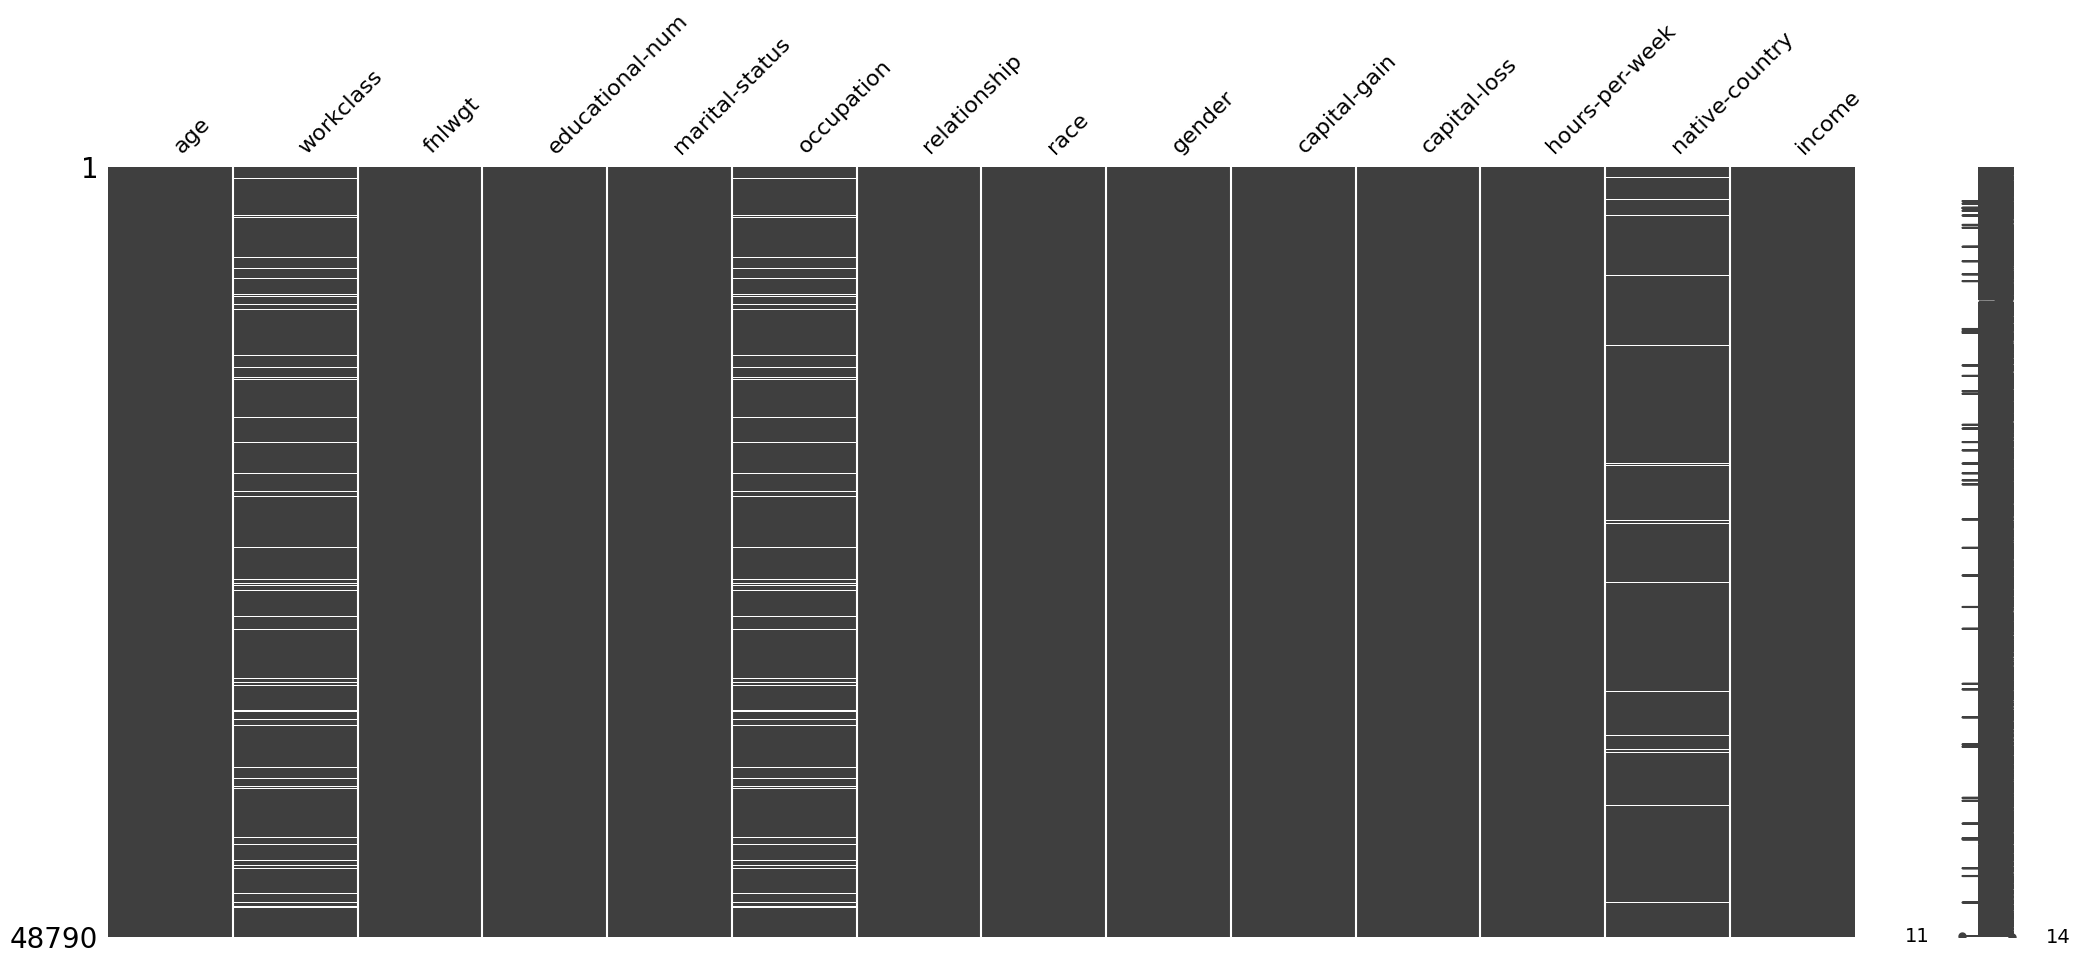

In [157]:
#Visualising missing values
msno.matrix(df_adult)

-Missng values will be imputed with constant

### Univariate visuals for the target and all features

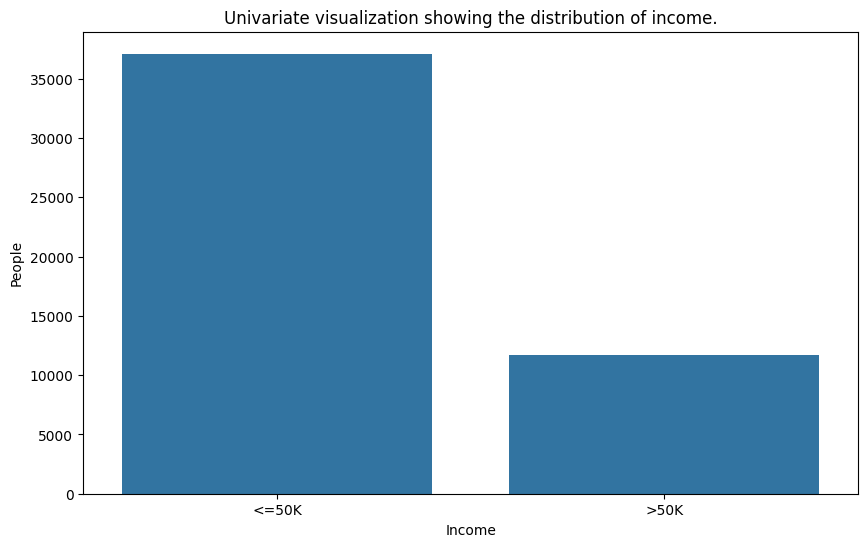

In [158]:
#Visualisation for the target
#Drawing plot for categorical type feature
fig, ax = plt.subplots(figsize=(10,6))
ax.set(title="Univariate visualization showing the distribution of income.",xlabel="Income",ylabel="People")
ax = sns.countplot(df_adult,x="income",ax=ax)

<ipython-input-147-ccbd5c11d05c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');
<ipython-input-147-ccbd5c11d05c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');
<ipython-input-147-ccbd5c11d05c>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right');


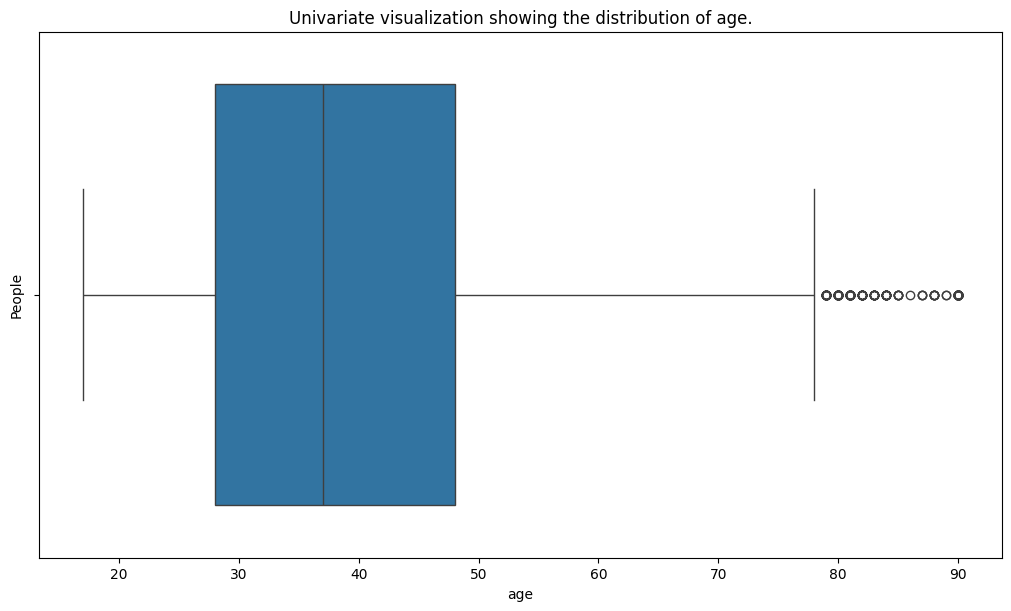

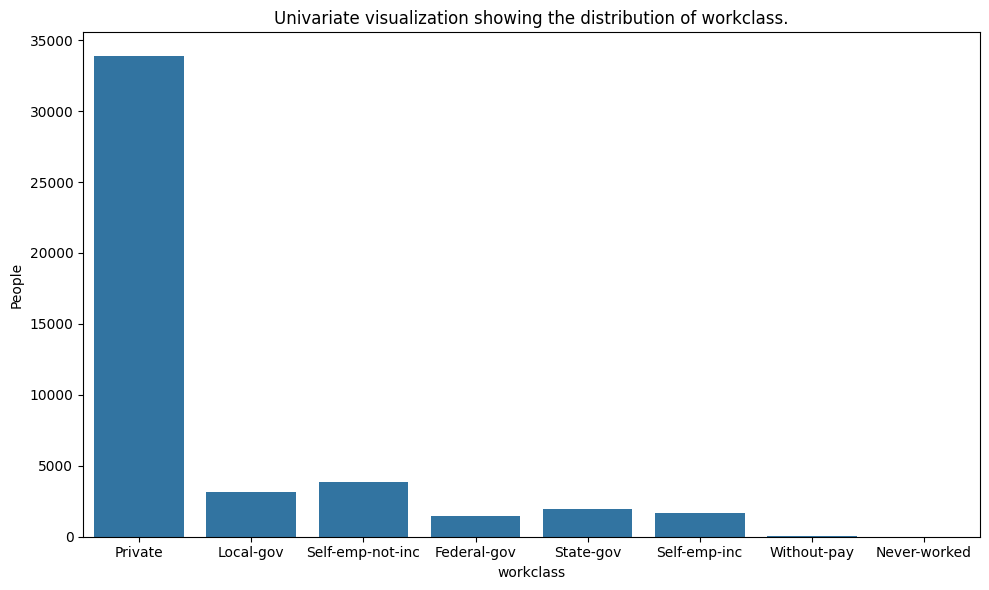

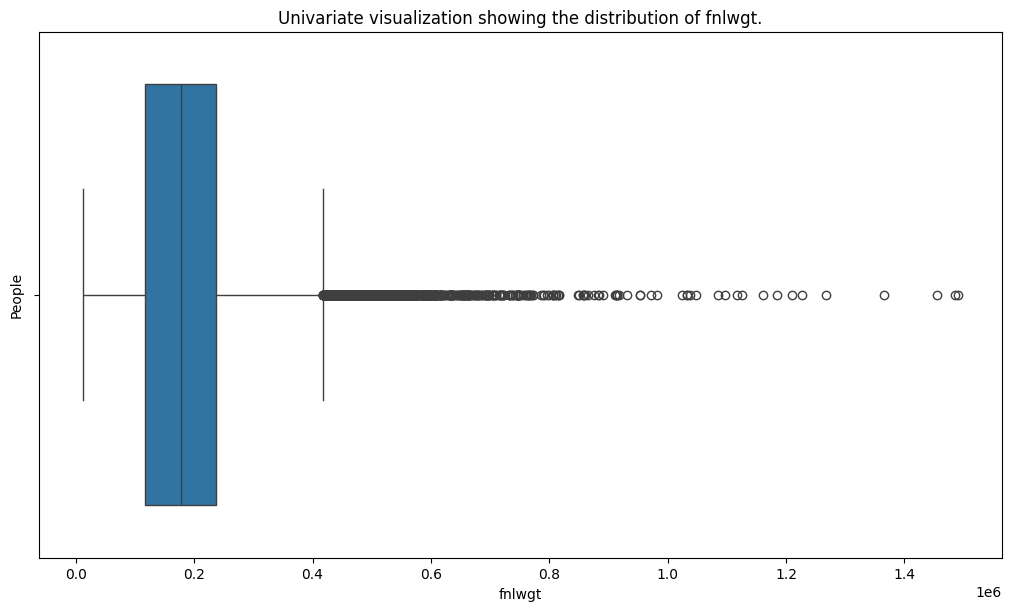

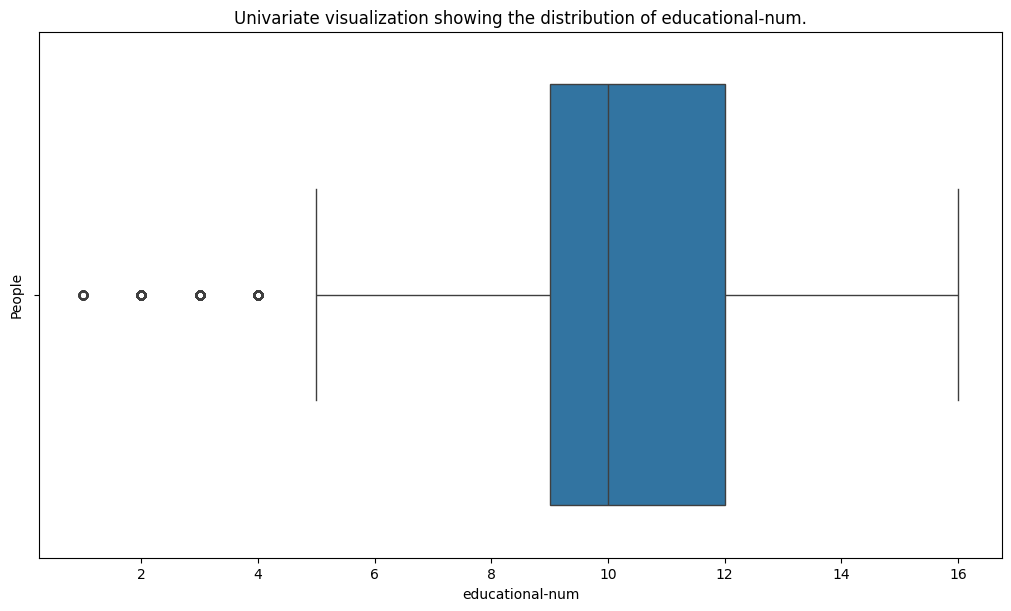

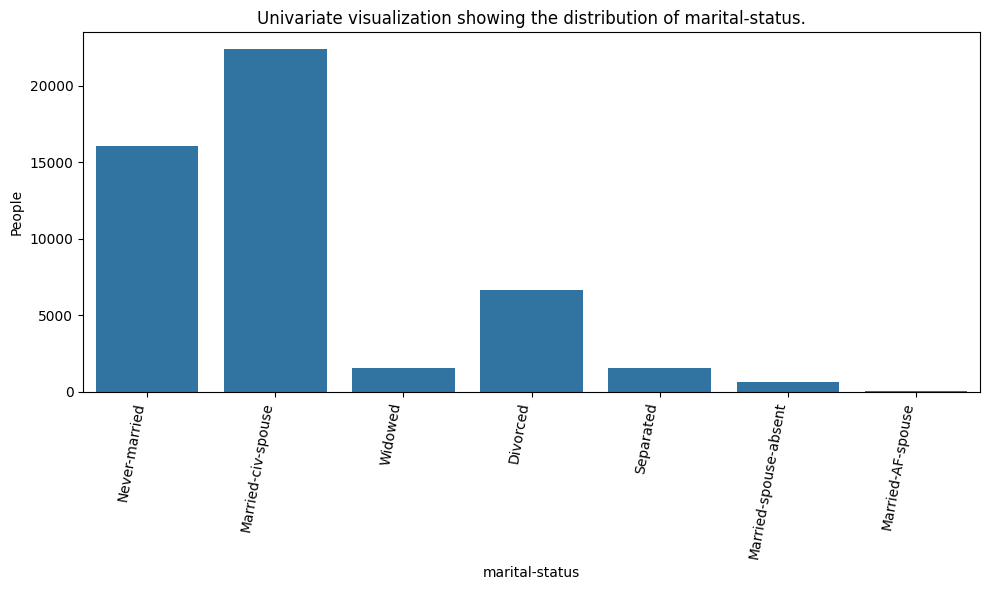

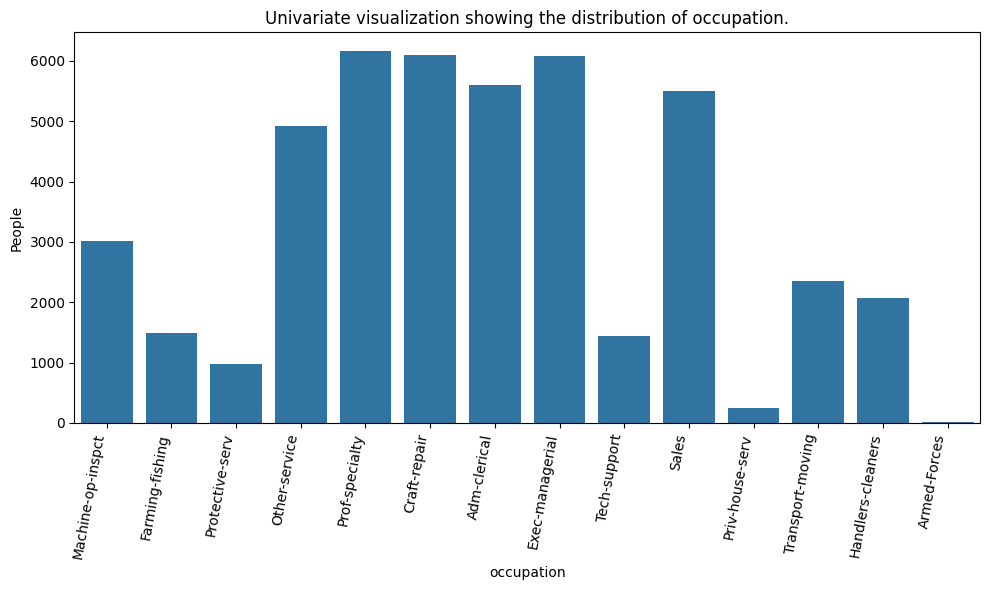

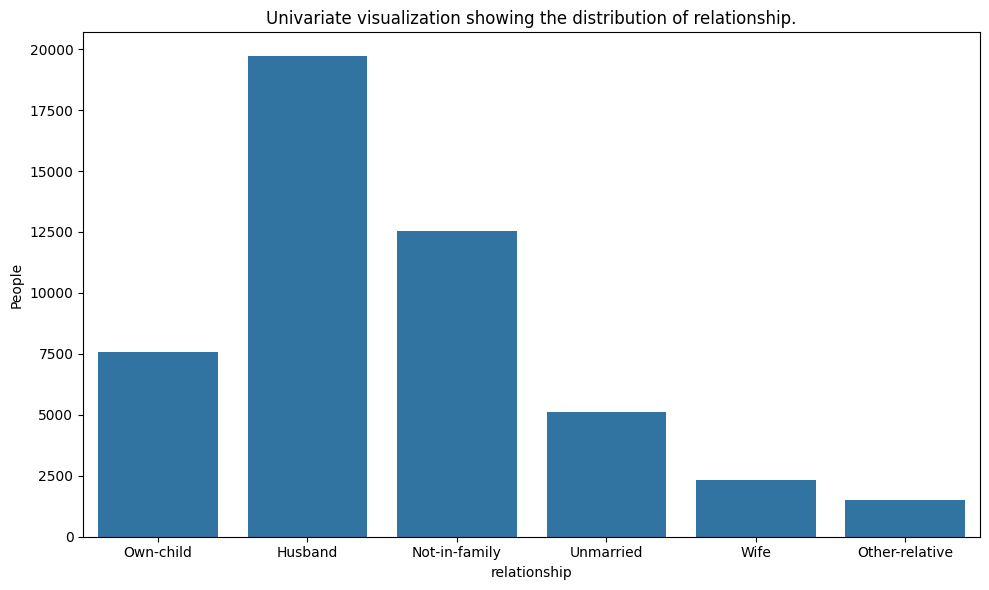

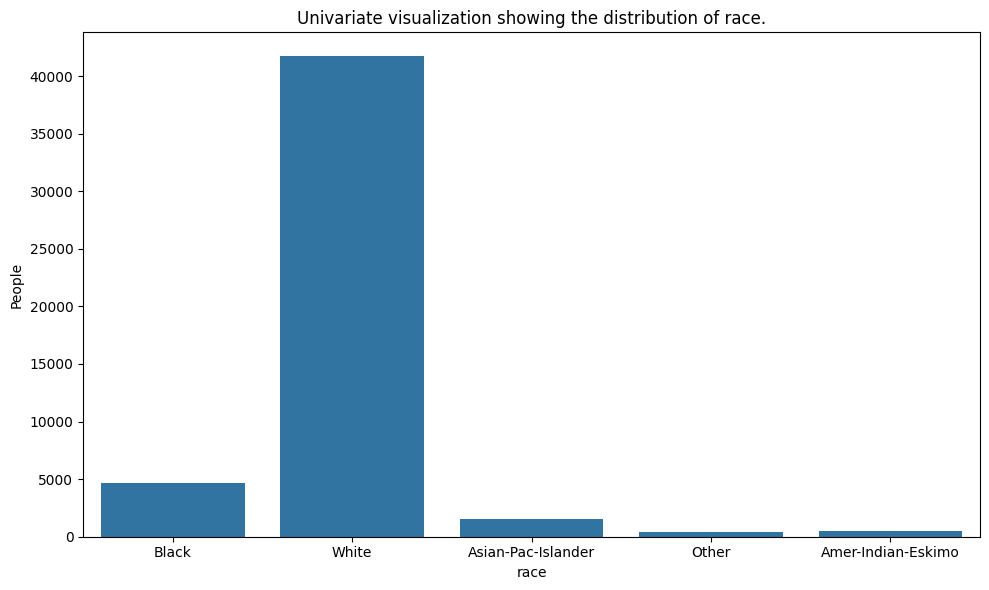

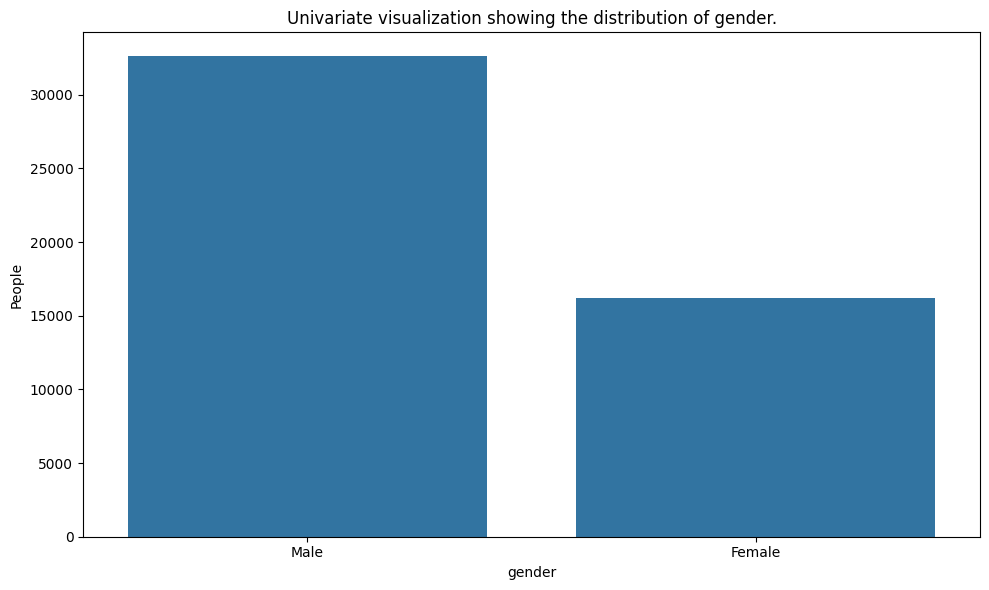

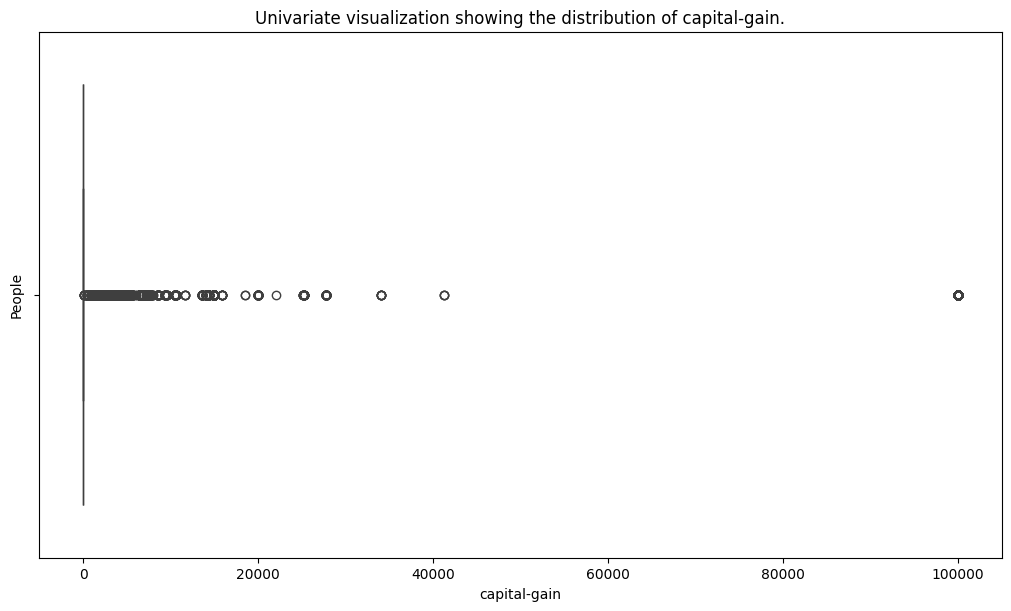

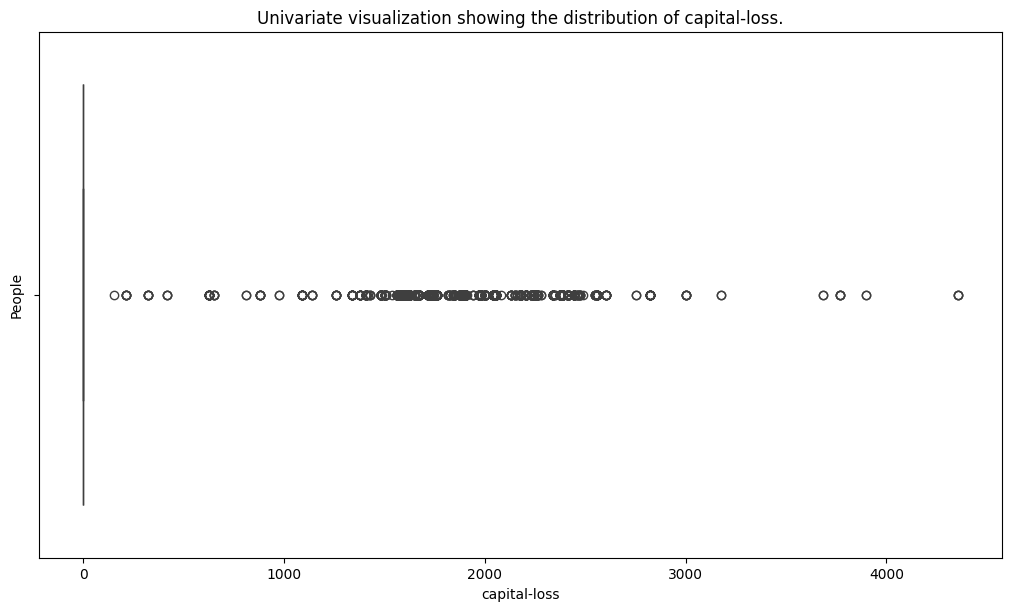

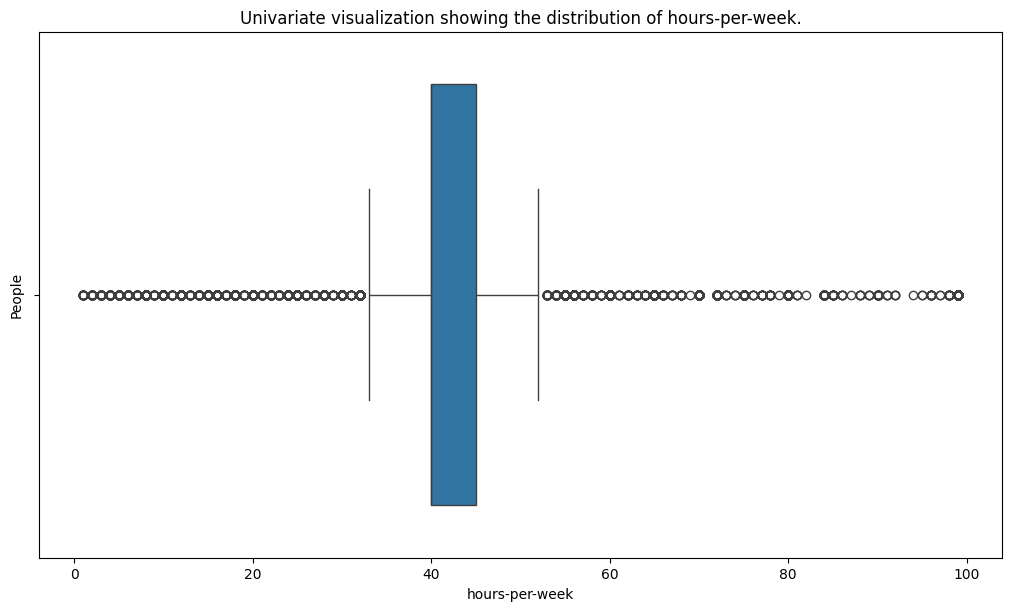

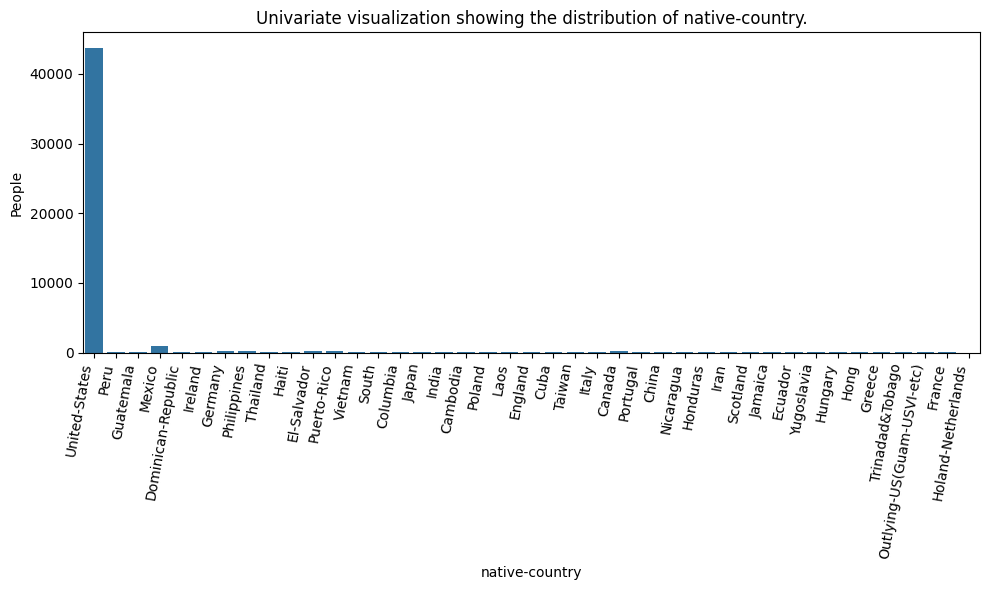

In [159]:
#Dropping target
df_adult_viz = df_adult.drop(columns=["income"])
#plotting visualisations
for i in df_adult_viz:
  univ_viz(dataf=df_adult_viz,col=i,ylabels="People")

OUTLIERS

- AGE: Anyone over the 80
- fnlwgt: Anything above 0.4
- educational-num: Anything below 5
- capital-gain: Anything above 0
- capital-loss: Anything above 0
- hours-per-week: Anything below 30 or above 50

## CIRRHOSIS PREDICTION DATASET

**Source of Data**

The dataset can be found in appendix D of:

Fleming, T.R. and Harrington, D.P. (1991) Counting Processes and Survival Analysis. Wiley Series in Probability and Mathematical Statistics: Applied Probability and Statistics, John Wiley and Sons Inc., New York.

fedesoriano. (August 2021). Cirrhosis Prediction Dataset. Retrieved 15-04-2024 from https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset.


**Description of the data**

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants

Fields: This dataset has 20 columns and 418 rows

Target field: Stage
Histological Stage of the disease is divided into 1,2,3 0r 4.

We can explore the possibility of predicting Histological stage of the disease based on the patient's medical information using *Classification*.

Number of attributes: 18
- These are the demographics and other features to describe *a patient*.

As the data contains 106 additional cases, there might be a large amount of incomplete data that needs to be cleaned.


In [160]:
#Loading data
fpath_cir="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/cirrhosis.csv"
df_cir=pd.read_csv(fpath_cir)

### Introductory info

In [161]:
df_cir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [162]:
df_cir.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Cleaning data


####Unnecessary columns

In [163]:
#setting ID as index
df_cir.set_index("ID",inplace=True)

#### Duplicated rows

In [164]:
#Duplicated rows

df_cir.duplicated().sum()

0

#### Inconsistent values

In [165]:
#Investigating value counts
for i in df_cir:
  print(df_cir[i].value_counts())
  print(df_cir[i].dtypes)
  print("")

N_Days
1434    2
3445    2
1216    2
1329    2
1067    2
       ..
2990    1
3098    1
3150    1
3149    1
976     1
Name: count, Length: 399, dtype: int64
int64

Status
C     232
D     161
CL     25
Name: count, dtype: int64
object

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64
object

Age
19724    7
18993    6
18628    6
23376    5
22646    5
        ..
15574    1
19295    1
18713    1
20256    1
12784    1
Name: count, Length: 344, dtype: int64
int64

Sex
F    374
M     44
Name: count, dtype: int64
object

Ascites
N    288
Y     24
Name: count, dtype: int64
object

Hepatomegaly
Y    160
N    152
Name: count, dtype: int64
object

Spiders
N    222
Y     90
Name: count, dtype: int64
object

Edema
N    354
S     44
Y     20
Name: count, dtype: int64
object

Bilirubin
0.7     33
0.6     31
0.5     23
0.8     23
1.1     20
        ..
24.5     1
10.8     1
3.7      1
5.9      1
4.6      1
Name: count, Length: 98, dtype: int64
float64

Cholesterol
260.0    4
3

In [166]:
#Invstigating impossible values
df_cir.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


There appears to be no inconsistent values

####Missing values

<Axes: >

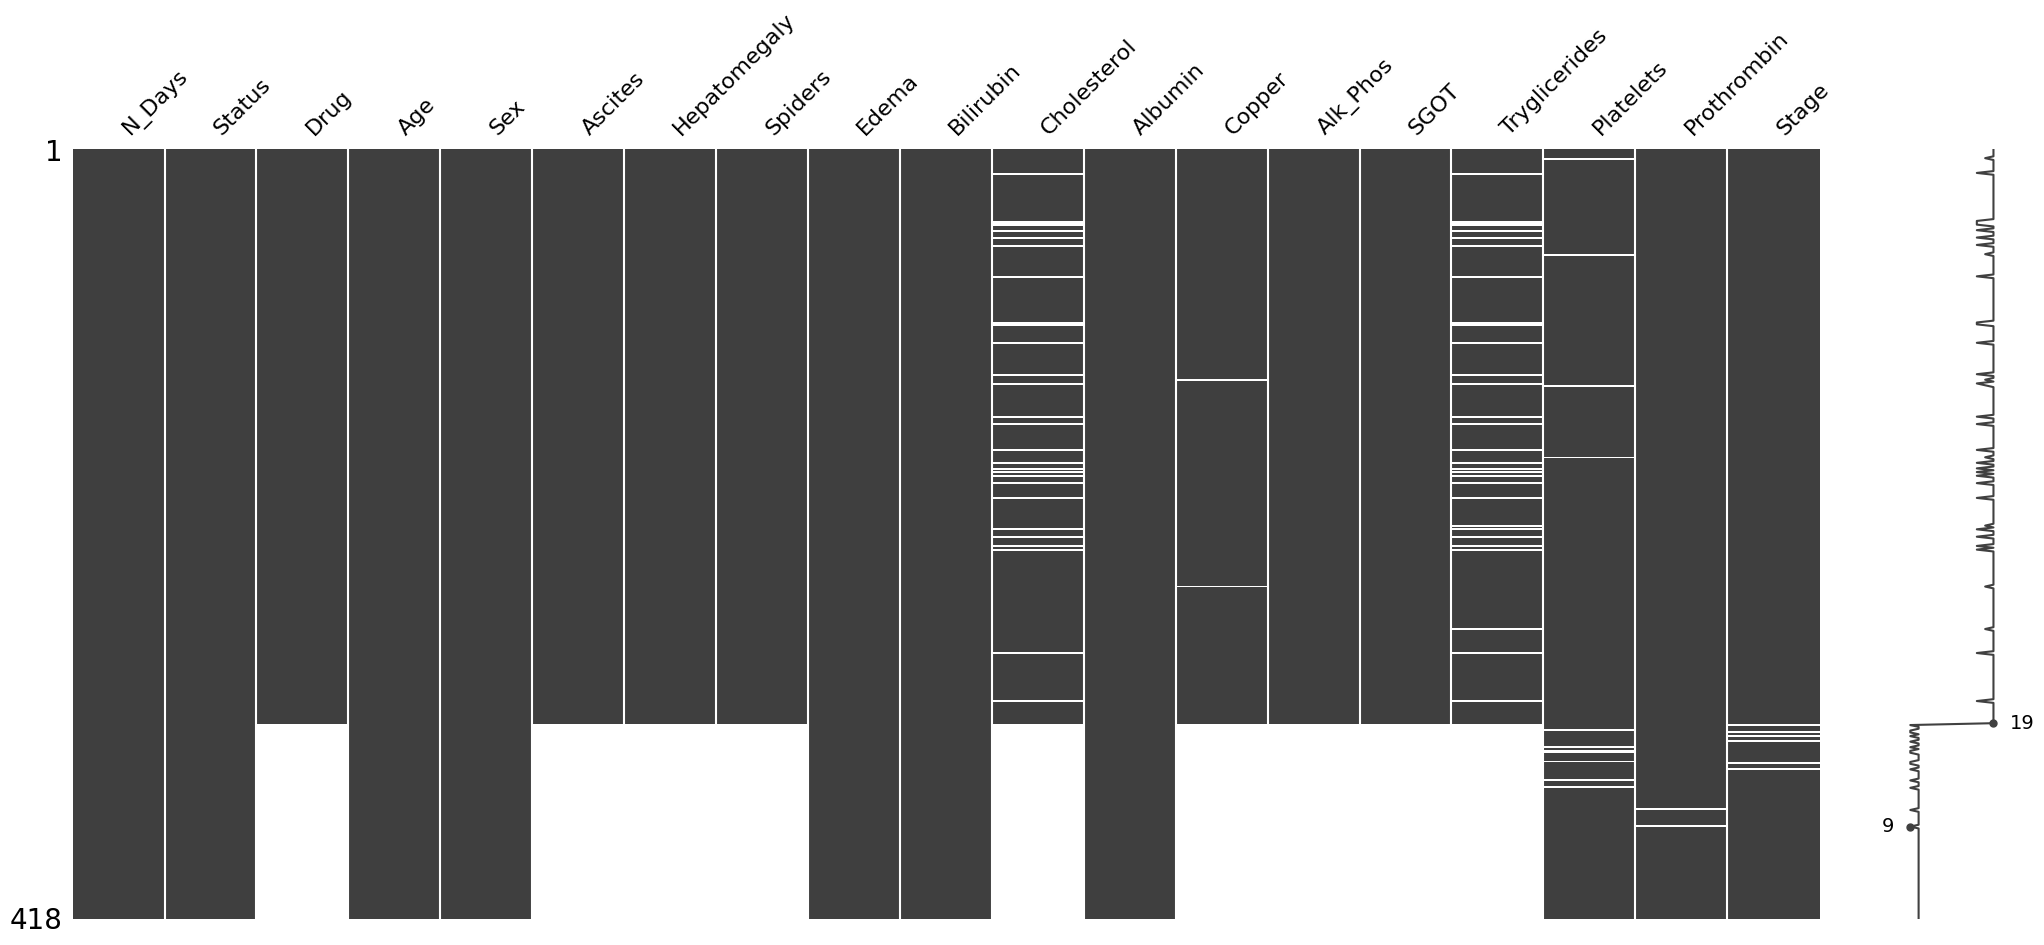

In [167]:
#Visualising missing values
msno.matrix(df_cir)

- Missing values will be imputed with constant
- There is need to investigate whether to drop incomplete rows(i.e rows missing over 5 entries

### Univariate visuals for the target and all features

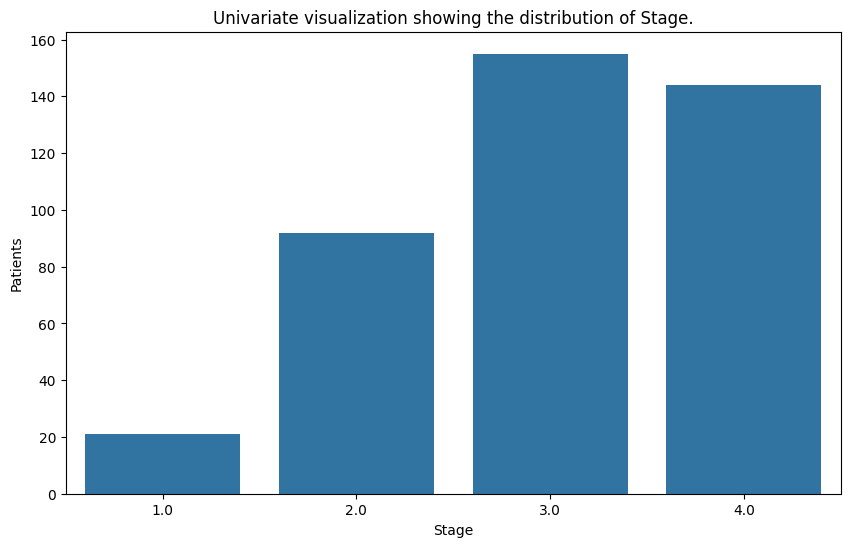

In [168]:
#Visualisation for the target
#Drawing plot for categorical type feature
fig, ax = plt.subplots(figsize=(10,6))
ax.set(title="Univariate visualization showing the distribution of Stage.",xlabel="Stage",ylabel="Patients")
ax = sns.countplot(df_cir,x="Stage",ax=ax)


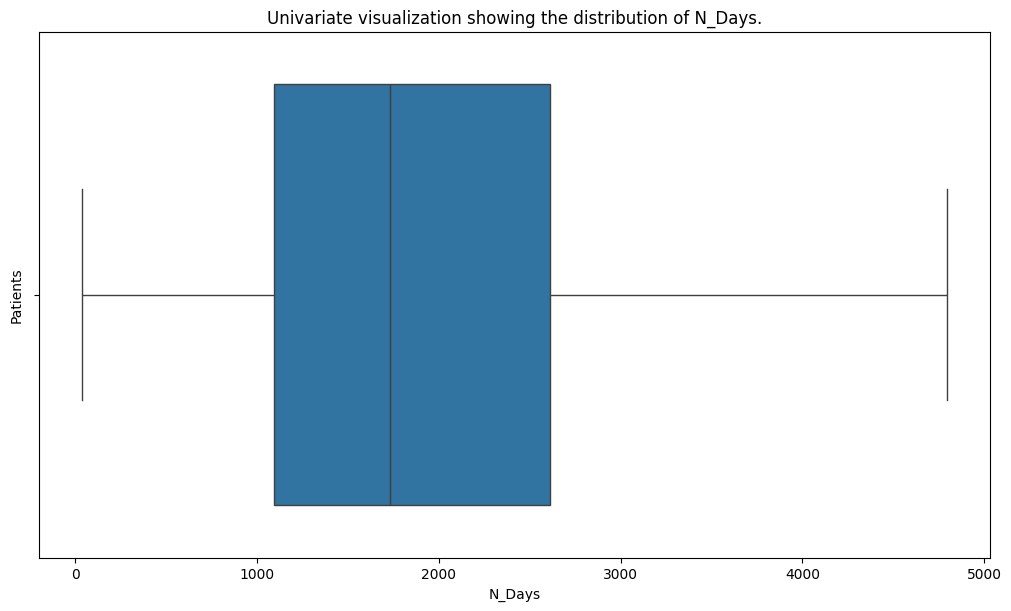

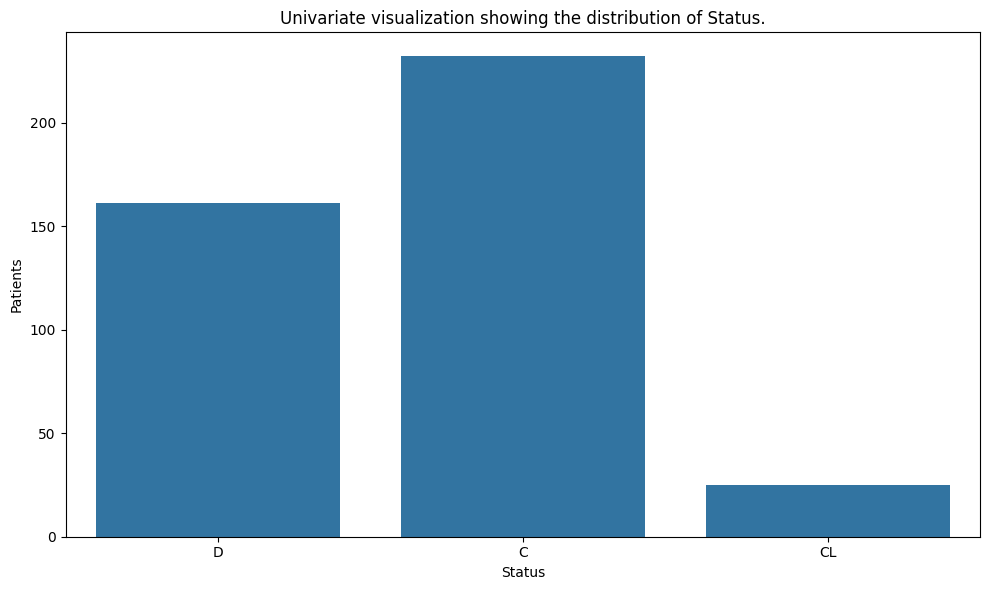

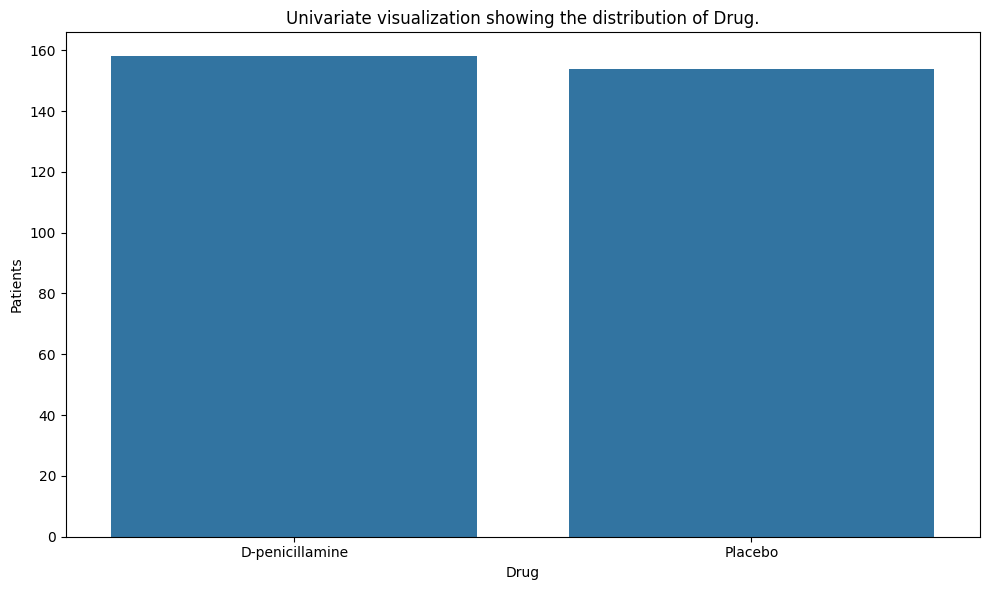

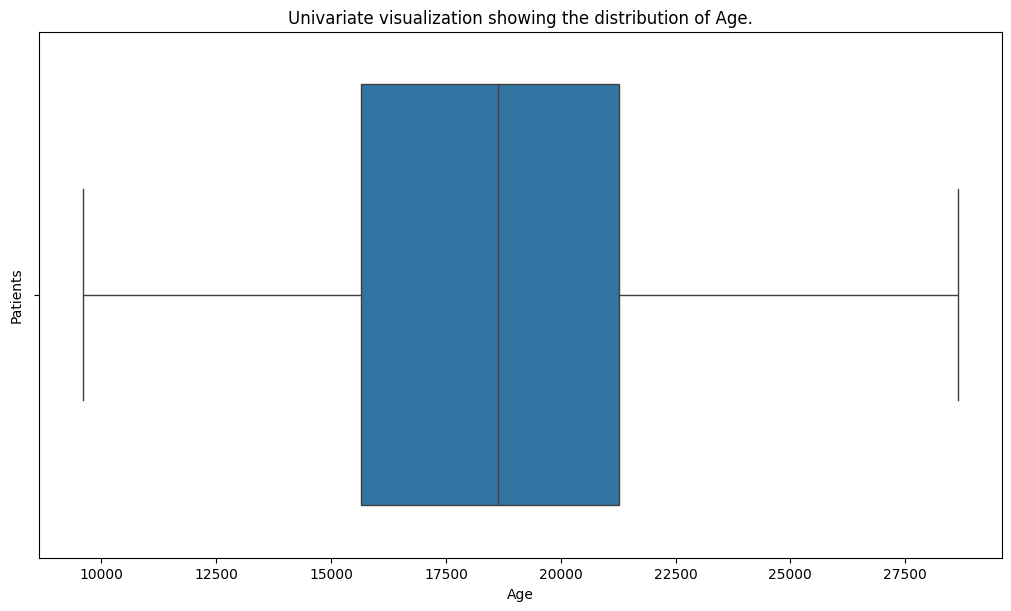

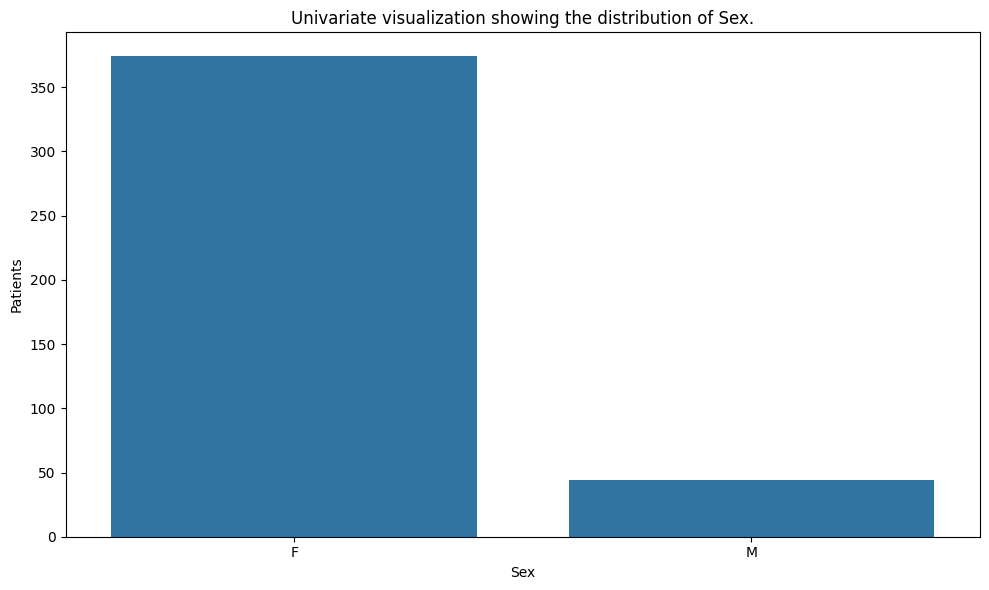

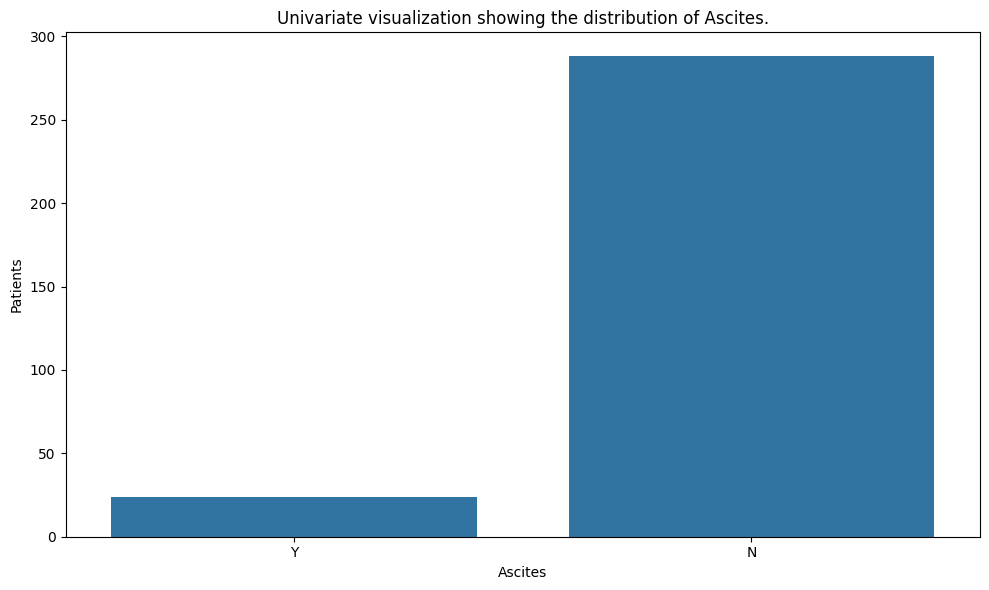

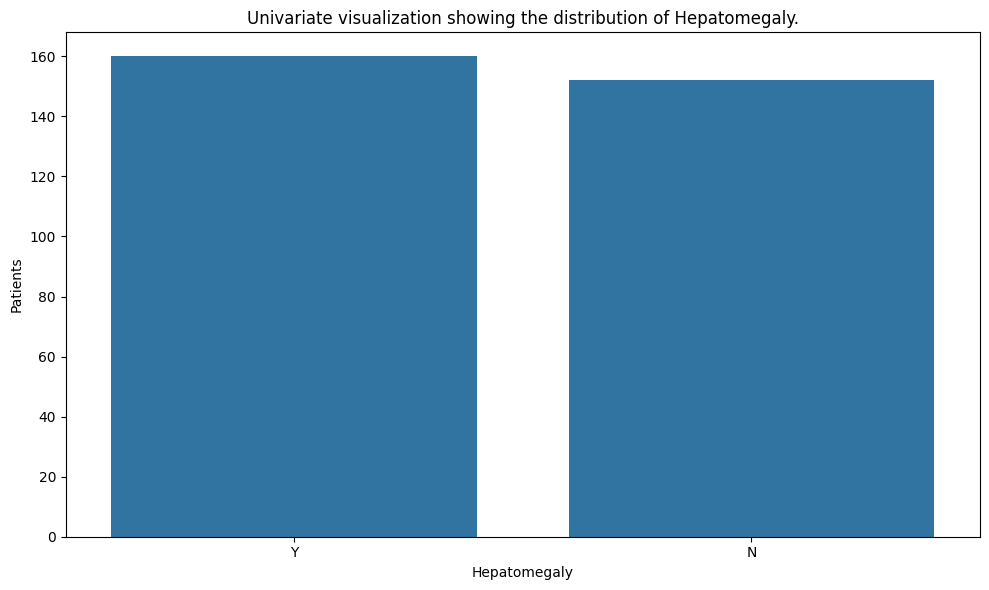

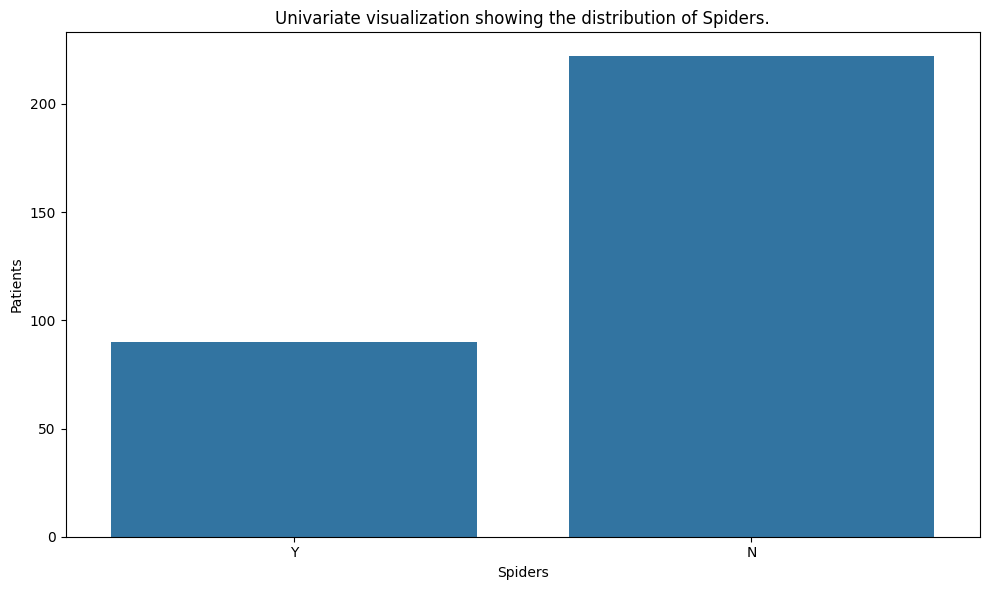

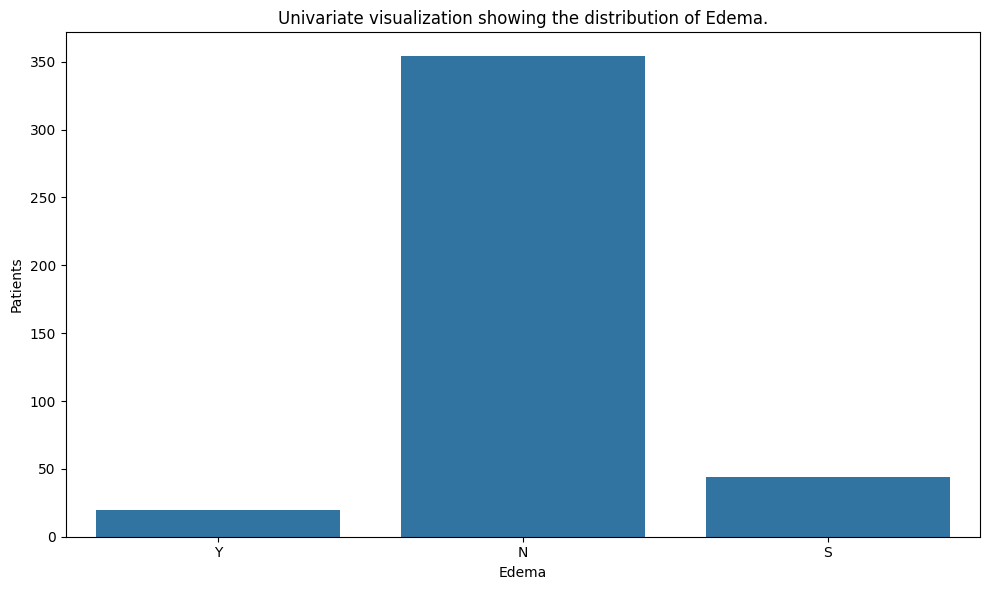

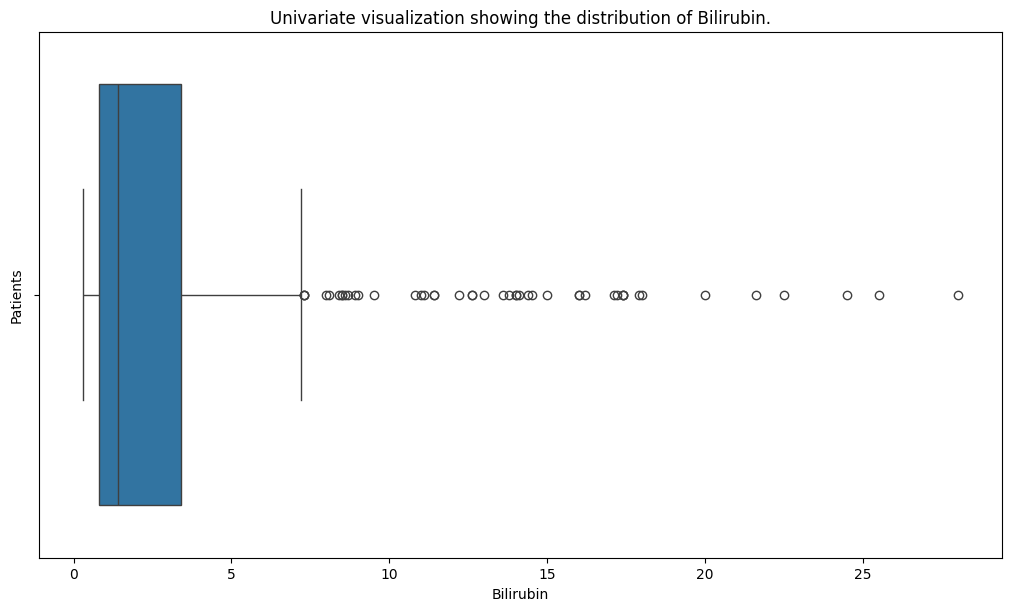

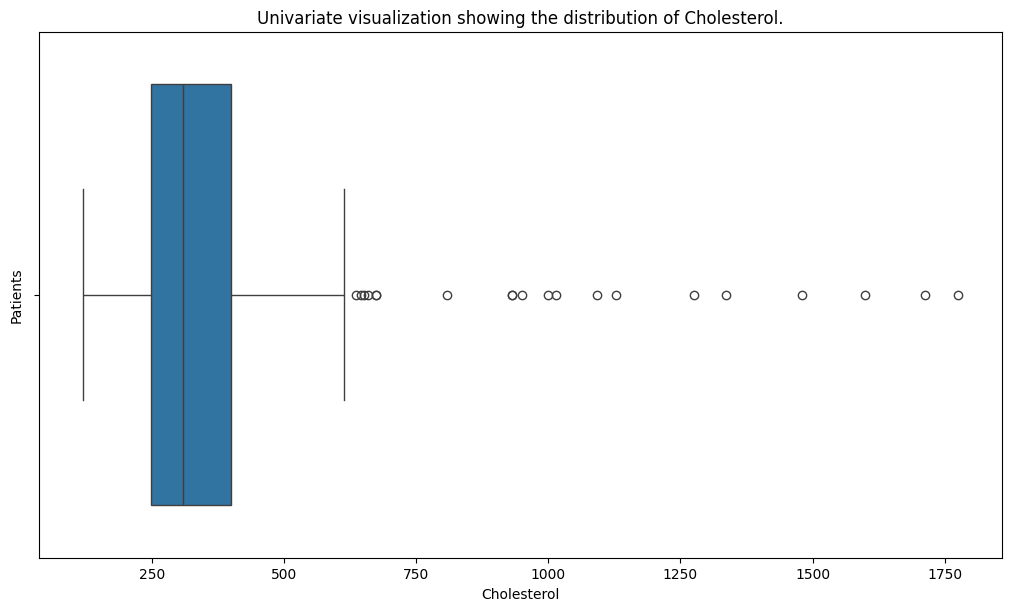

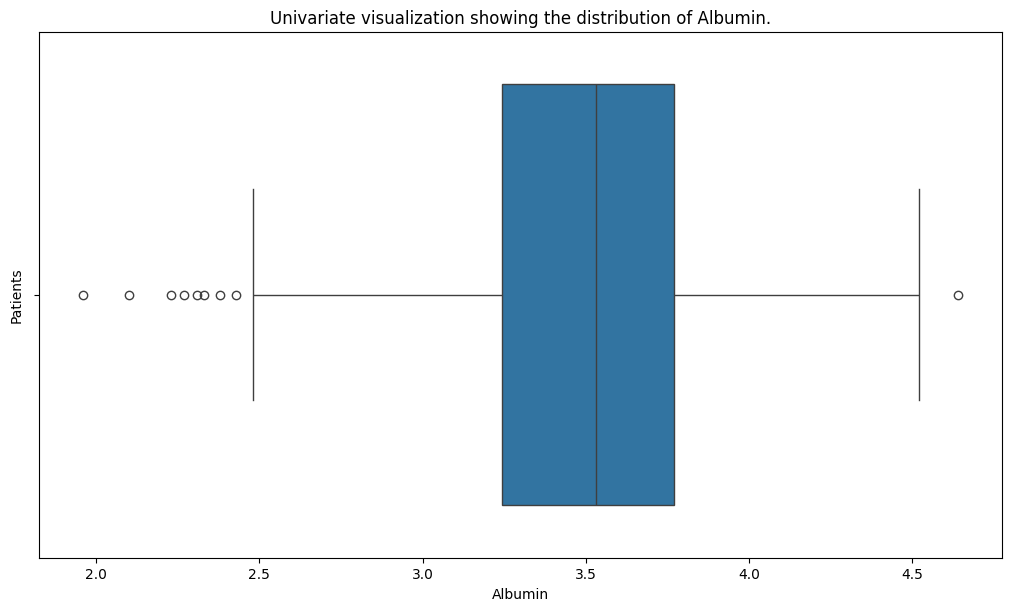

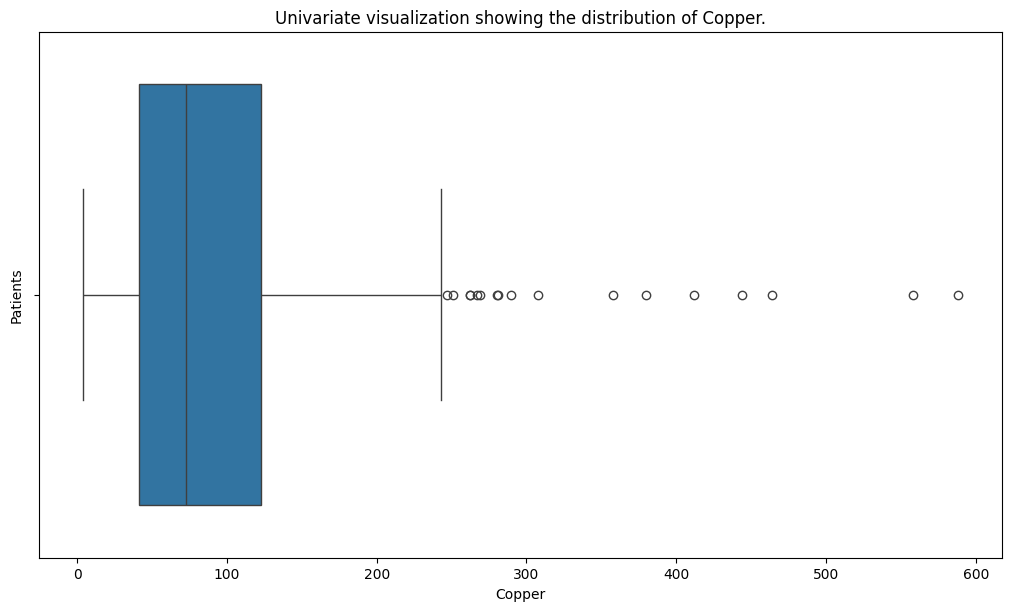

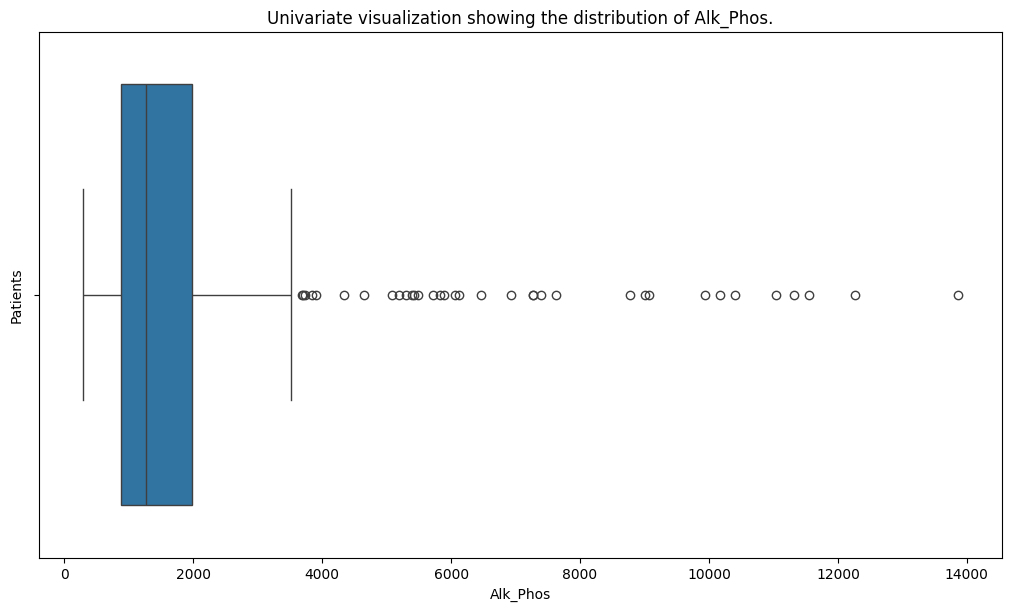

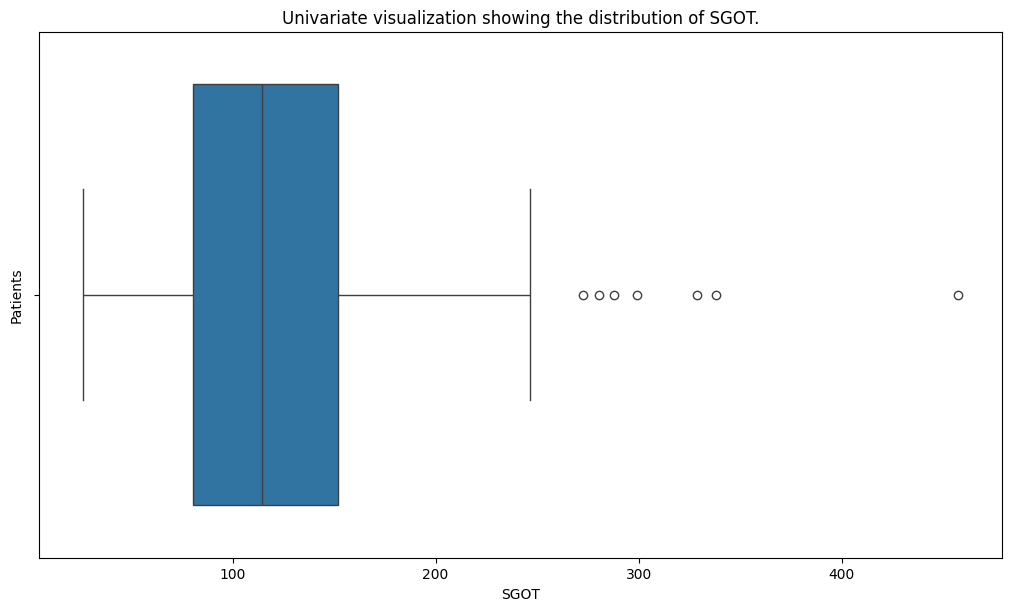

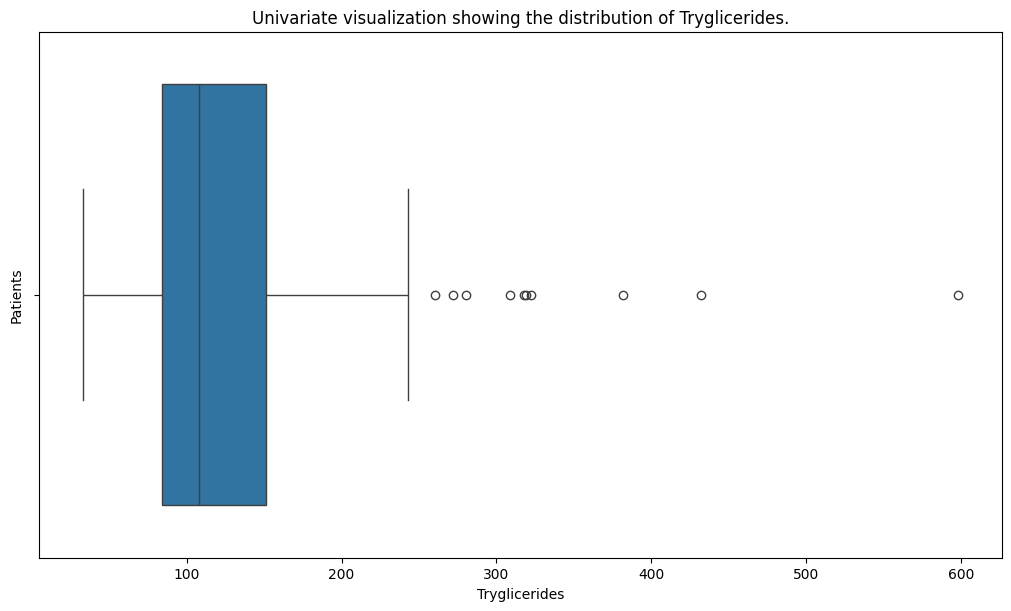

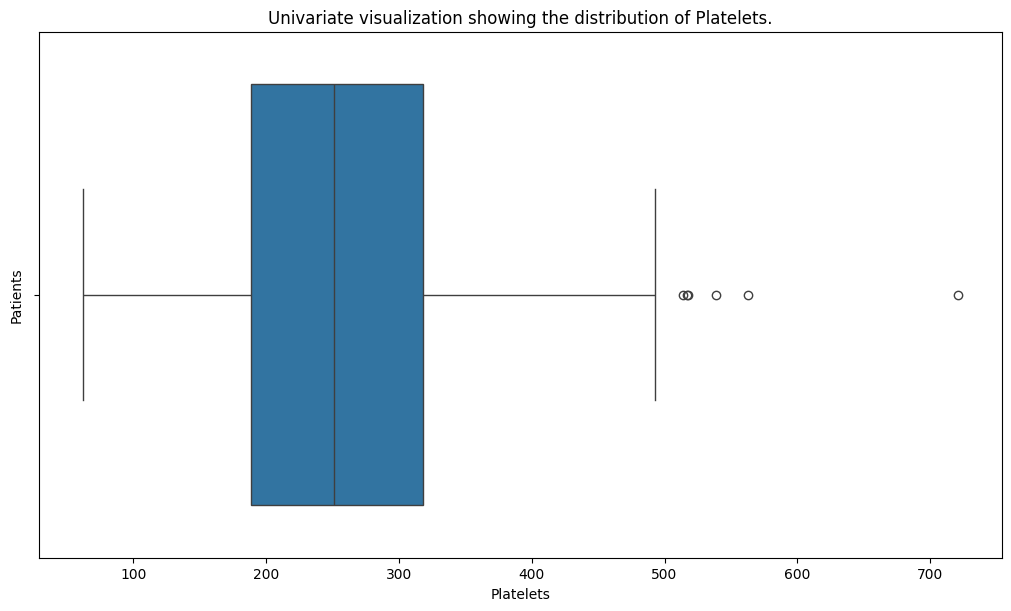

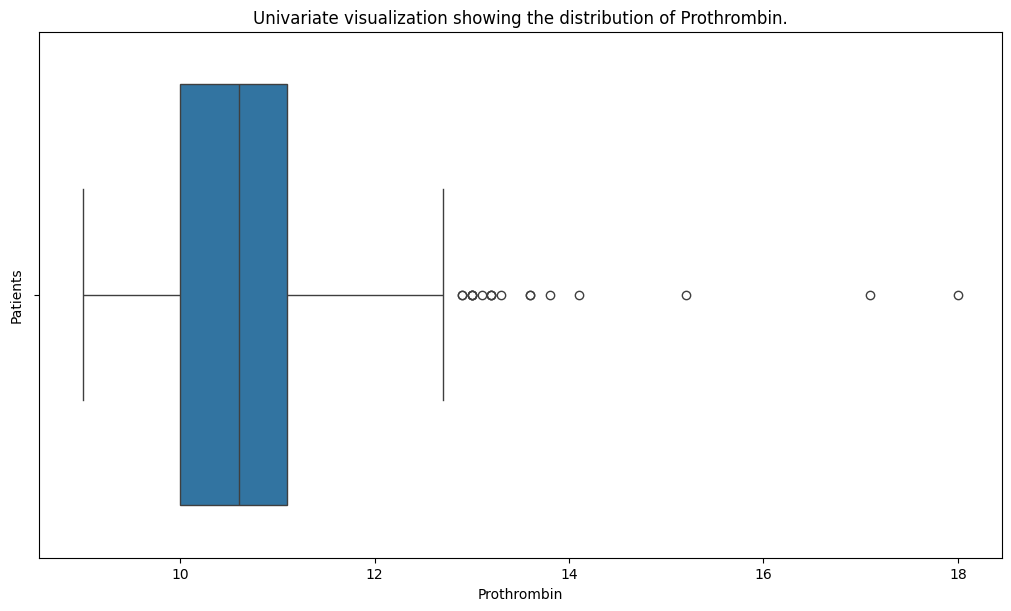

In [169]:
#dropping feature
df_cir_viz= df_cir.drop(columns=["Stage"])
#plotting visualisations
for i in df_cir_viz:
  univ_viz(dataf=df_cir,col=i,ylabels="Patients")

OUTLIERS

- Bilirubin: Anything above 8
- Cholesterol: Anything above 625
- Albumin: Anything below 2.5 or 4.5
- Copper: Anything above 250
- Alk_Phos: Anything above 3800
- SGOT: Anything above 250
- Tryglicerides: Anything above 250
- Platelets: Anything above 500
- Prothrombin: Anything above 13